<a href="https://colab.research.google.com/github/Zaidkhairdi2029/first-contribution/blob/main/DigitalRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models



In [ ]:
# load the MNIST dataset
(train_image, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# preprocessing the data (normalization and reshaping)
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:


# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 classes for digits 0-9
])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # Changed 'matrics' to 'metrics'

In [ ]:
from re import VERBOSE
# Function to train the model with specified number of epochs
def train_model(num_epochs):
  # Train the model
  model.fit(train_images, train_labels, epochs=num_epochs, validation_data=(test_images, test_labels), VERBOSE=1)

  # Save the model to fit
  model.save('digit_recognition_model.h5')
  print(f"Model saved successfully after {num_epochs} epochs!")

In [ ]:
# Function to train the model with specified number of epochs
def train_model(num_epochs):
  # Train the model
  # Changed VERBOSE to verbose (lowercase)
  model.fit(train_images, train_labels, epochs=num_epochs, validation_data=(test_images, test_labels), verbose=1)

  # Save the model to fit
  model.save('digit_recognition_model.h5')
  print(f"Model saved successfully after {num_epochs} epochs!")

In [ ]:
# Funtion to preprocess uploaded and predict digit
def process_and_predict_image(image_path):
    #Open and convert the image to grayscale
    img = Image.open(image_path).convert('L')
    # Resize the image to 28x28 pixels (same size as MNIST dataset images)
    img = img.resize((28, 28)) # Added '=' to fix assignment error
    # Invert the image (if the background is white and digits are black)
    img = np.invert(img) # Removed extra 'I'
    # Convert the image to a numpy array and normalize it
    img_array = np.array(img) / 255.0
    # Reshape the array to fit the model input (28, 28, 1)
    img_array = img_array.reshape(1, 28, 28, 1) # Added '=' to fix assignment error
    # Predict the digit
    prediction = model.predict(img_array) # Added '=' to fix assignment error
    predicted_digit = np.argmax(prediction)
    # Display the image and prediction
    plt.imshow(img_array.reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f'prediction Digit: {predicted_digit}')
    plt.show()

    return predicted_digit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


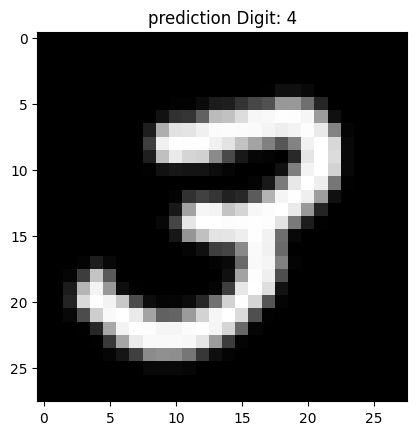

The model predicts the digit is: 4


In [ ]:
# Example usage
# Replace 'your_image_path.png' with the path to the uploaded image

# Assuming your image is in your Google Drive, you need to mount Google Drive first.
# Run the following code in a separate cell:
# from google.colab import drive
# drive.mount('/content/drive')
# Then, change the uploaded_image_path to match the location in your Google Drive, for example:
# uploaded_image_path = '/content/drive/MyDrive/MNIST_digit.png'

# If you have uploaded the image directly to Colab, then your path is more likely:
uploaded_image_path = '/content/MNIST_digit.png' # The image should be in the main Colab directory


predicted_digit = process_and_predict_image(uploaded_image_path)
print(f'The model predicts the digit is: {predicted_digit}')